In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [28]:
# Load the dataset
df = pd.read_csv('CleanedDataset.csv')

In [29]:
X = df['full_text']
y = df['Party']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Convert the tweets into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [32]:
# Convert the test tweets into numerical features
X_test = vectorizer.transform(X_test)
#X_test = hstack([X_test, test_data['Score'].values.reshape(-1, 1)])


In [33]:
# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [35]:
y_pred

,0
0,BJP
1,Congress
2,Congress
3,BJP
4,BJP
...,...
7970,BJP
7971,BJP
7972,BJP
7973,BJP


In [36]:
# Evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8383699059561128


In [37]:
total_count = 0
for i in y_pred:
    total_count+=1
total_count

1

In [44]:
bjp_count = 0
for i in y_pred[0]:
    if i == 'BJP':
        bjp_count+=1
bjp_count

5408

In [45]:
df = pd.read_csv('new_election.csv')

In [47]:
predict_data = df['full_text']

In [49]:
predict_data = vectorizer.transform(predict_data)

In [50]:
# Make predictions on the test set
y_pred = clf.predict(predict_data)
y_pred = pd.DataFrame(y_pred)

In [51]:
y_pred

,0
0,BJP
1,BJP
2,Congress
3,BJP
4,BJP
...,...
19903,Other
19904,Congress
19905,Congress
19906,BJP


In [52]:
bjp_count = 0
for i in y_pred[0]:
    if i == 'BJP':
        bjp_count+=1
bjp_count

12698

In [53]:
cong_count = 0
for i in y_pred[0]:
    if i == 'Congress':
        cong_count+=1
cong_count

6720

In [56]:
other_count = 0
for i in y_pred[0]:
    if i == 'Other':
        other_count+=1
other_count

490

In [57]:
bjp_percentage = bjp_count/19908*100
cong_percentage = cong_count/19908*100
other_percentage = other_count/19908*100
print(bjp_percentage)
print(cong_percentage)
print(other_percentage)

63.78340365682138
33.755274261603375
2.461322081575246


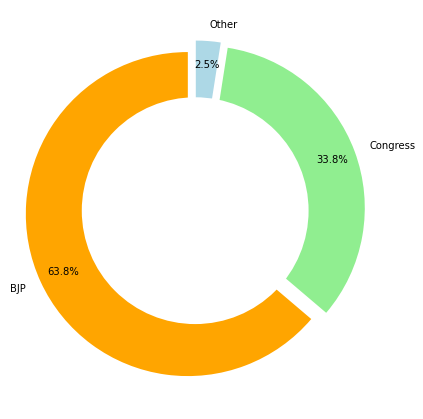

In [58]:
plt.rcParams["figure.figsize"] = [6,6]
labels = ["BJP","Congress","Other"]
count = [bjp_count,cong_count,other_count]
explode = (0.05,0.05,0.05)
patches, texts,autotexts = plt.pie(count,labels=labels, explode = explode,colors = ["orange","lightgreen","lightblue"], startangle=90, autopct='%1.1f%%',shadow = False, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [59]:
percentages = [12698,6720,490]
parties = ['BJP','Congress','others']

<BarContainer object of 3 artists>

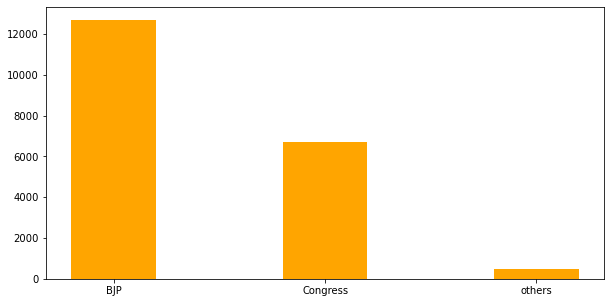

In [65]:
fig = plt.figure(figsize = (10, 5))
plt.bar(parties, percentages, color ='orange',
        width = 0.4)